In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
dataset = pd.read_csv('BlackFriday.csv')
dataset.shape
dataset.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [4]:
dataset.shape

(537577, 12)

In [10]:
#find missing values
print(dataset.isnull().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64


In [6]:
#can those be imputed as "no sale made"?
print(dataset['Product_Category_1'].min())
print(dataset['Product_Category_1'].min())

1
1


In [11]:
#how many categories are there? 
print(dataset['Product_Category_1'].unique())

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]


In [13]:
#since all data is integers, sub with 0
dataset.fillna(value=0,inplace=True)

In [14]:
#recheck missing values
print(dataset.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


In [61]:
#How does the purchase value look like?
dataset['Purchase'].describe()


count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

In [62]:
#average spend per transaction
print(dataset['Purchase'].mean())

9333.859852635065


In [59]:
#average purchase value by customer
print(dataset['Purchase'].sum() / dataset['User_ID'].nunique())

851751.5494822611


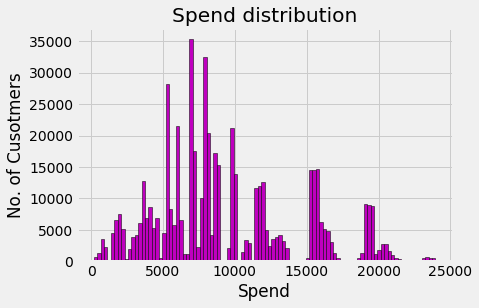

In [39]:
#plot some 
plt.hist(dataset['Purchase'], bins=100, color='m', edgecolor = 'k');
plt.xlabel('Spend'); 
plt.ylabel('No. of Cusotmers'); 
plt.title('Spend distribution');

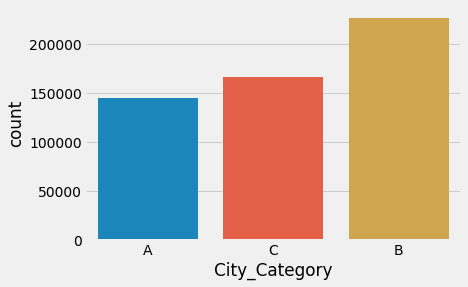

In [24]:
#orders by city count
sns.countplot(dataset.City_Category)

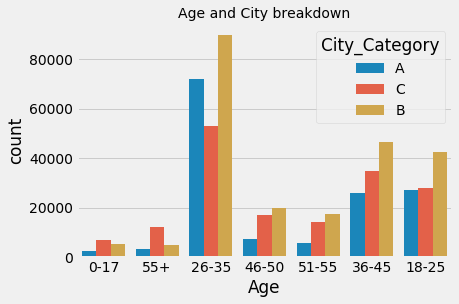

In [65]:
#city wise orders distributed by age

sns.countplot(dataset.Age, hue=dataset.City_Category);
plt.title('Age and City breakdown', size=14);

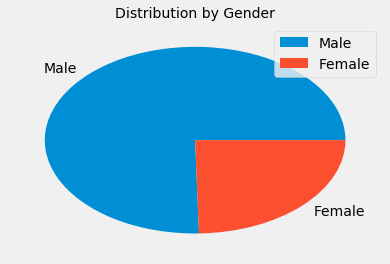

In [67]:
plt.pie(dataset['Gender'].value_counts(),labels=['Male','Female']);
plt.legend();
plt.title('Distribution by Gender', size=14);

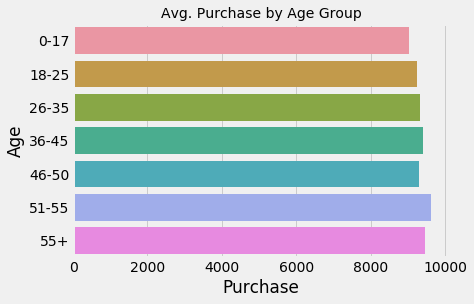

In [68]:
#avg. purchase amount by age group
age_pur = dataset[['Age', 'Purchase']].groupby('Age', as_index=False).agg('mean')
sns.barplot(y='Age', x='Purchase', data=age_pur, order=sorted(dataset.Age.unique()))
plt.title('Avg. Purchase by Age Group', size=14)
plt.ylabel('Age')
plt.show()